In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch01 머신러닝입문 Linear regression</font>

# 1. 기존의 프로그램 방식

- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erroerror ; 절대값평균)
- https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명 : https://www.mql5.com/ko/articles/11200

In [2]:
# 섭씨 온도를 화씨 온도로 출력

def celsius_to_faherenheit(c) :
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨 온도 : '))
print('화씨 온도 :', celsius_to_faherenheit(input_c))

섭씨 온도 : 70
화씨 온도 : 158.0


# 2. 머신러닝 프로그램 방식

```
1. 데이터 확보 및 생성
2. 데이터 전처리 : 
    스케일 조정
    훈련 데이터(학습 데이터셋), 검증 데이터, 시험 데이터셋으로 분할
3. 모델 구성
4. 모델 학습과정 설정
5. 모델 학습시키기
6. 모델 평가 (시험 데이터셋 이용)
7. 모델 저장 및 사용 (입력값이 주어지면 예측값 받기)
```

# 2.1 노이즈가 없는 데이터로 실습

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 1. 데이터 생성

data_C = np.arange(100)  # 0부터 99까지
data_C  # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_F = celsius_to_faherenheit(data_C)
data_F  # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정

scaled_data_C = data_C / 100.0
scaled_data_F = data_F / 100.0
print('학습시 독립변수 :', scaled_data_C)
print('학습시 타켓변수 :', scaled_data_F)

학습시 독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 타켓변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1

In [8]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf

print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [9]:
# 3. 모델 구성

from tensorflow.keras.models import Sequential  # 모델 생성
from tensorflow.keras.layers import Dense, Input  # 입력값과 출력값으로 layer층 지정

model = Sequential()
# model.add(Input(shape = (1, )))
# model.add(Dense(1))
model.add(Dense(units = 1,  # 타켓(종속)변수의 갯수
                input_shape = (1, )))  # 입력(독립)변수의 shape

In [10]:
# 4. 모델 학습과정 설정

model.compile(loss = 'mse',  # 손실함수 - 모델 학습 중 오차를 최소화
              optimizer = 'rmsprop',  # 옵티마이저
              metrics = ['mae'])  # 평가지표
# mse : 오차 제곱의 평균
# mae : 오차 절대값의 평균 (이상치 영향이 감소)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 학습 전 예측

model.predict(np.array([[0],
                       [0.01]]))  # 섭씨 온도 0, 1 도는 화씨 온도 몇 도?

1/1 [==============================] - 0s 71ms/step


array([[ 0.        ],
       [-0.01581394]], dtype=float32)

In [12]:
# 학습 전 모델 저장

model.save('model/before_learning.h5')

In [13]:
# 5. 모델 학습시키기 - 1번만 실행

hist = model.fit(scaled_data_C,  # 입력변수 (훈련 데이터)
                 scaled_data_F,  # 타켓변수 (훈련 데이터)
                 epochs = 1000,  # 학습 횟수
                 verbose = 2)  # 학습시 출력여부 (0 : 학습 내용 출력 X)

Epoch 1/1000
4/4 - 0s - loss: 4.9074 - mae: 1.9892 - 337ms/epoch - 84ms/step
Epoch 2/1000
4/4 - 0s - loss: 4.8568 - mae: 1.9773 - 8ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 4.8232 - mae: 1.9698 - 8ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 4.7935 - mae: 1.9628 - 6ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 4.7663 - mae: 1.9565 - 9ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 4.7384 - mae: 1.9499 - 8ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 4.7135 - mae: 1.9441 - 7ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 4.6859 - mae: 1.9376 - 10ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 4.6594 - mae: 1.9314 - 17ms/epoch - 4ms/step
Epoch 10/1000
4/4 - 0s - loss: 4.6349 - mae: 1.9256 - 12ms/epoch - 3ms/step
Epoch 11/1000
4/4 - 0s - loss: 4.6109 - mae: 1.9198 - 8ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 4.5884 - mae: 1.9143 - 8ms/epoch - 2ms/step
Epoch 13/1000
4/4 - 0s - loss: 4.5653 - mae: 1.9089 - 7ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - los

4/4 - 0s - loss: 2.5276 - mae: 1.3483 - 6ms/epoch - 1ms/step
Epoch 111/1000
4/4 - 0s - loss: 2.5102 - mae: 1.3431 - 16ms/epoch - 4ms/step
Epoch 112/1000
4/4 - 0s - loss: 2.4904 - mae: 1.3369 - 9ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 2.4740 - mae: 1.3317 - 8ms/epoch - 2ms/step
Epoch 114/1000
4/4 - 0s - loss: 2.4558 - mae: 1.3260 - 6ms/epoch - 1ms/step
Epoch 115/1000
4/4 - 0s - loss: 2.4398 - mae: 1.3209 - 6ms/epoch - 2ms/step
Epoch 116/1000
4/4 - 0s - loss: 2.4229 - mae: 1.3156 - 5ms/epoch - 1ms/step
Epoch 117/1000
4/4 - 0s - loss: 2.4053 - mae: 1.3099 - 6ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 2.3898 - mae: 1.3052 - 5ms/epoch - 1ms/step
Epoch 119/1000
4/4 - 0s - loss: 2.3721 - mae: 1.2996 - 6ms/epoch - 2ms/step
Epoch 120/1000
4/4 - 0s - loss: 2.3545 - mae: 1.2939 - 6ms/epoch - 2ms/step
Epoch 121/1000
4/4 - 0s - loss: 2.3382 - mae: 1.2888 - 7ms/epoch - 2ms/step
Epoch 122/1000
4/4 - 0s - loss: 2.3212 - mae: 1.2833 - 6ms/epoch - 1ms/step
Epoch 123/1000
4/4 - 0s - 

Epoch 218/1000
4/4 - 0s - loss: 1.0582 - mae: 0.8398 - 6ms/epoch - 1ms/step
Epoch 219/1000
4/4 - 0s - loss: 1.0486 - mae: 0.8362 - 6ms/epoch - 2ms/step
Epoch 220/1000
4/4 - 0s - loss: 1.0388 - mae: 0.8322 - 6ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 1.0287 - mae: 0.8282 - 6ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 1.0204 - mae: 0.8250 - 6ms/epoch - 2ms/step
Epoch 223/1000
4/4 - 0s - loss: 1.0098 - mae: 0.8206 - 6ms/epoch - 2ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.9996 - mae: 0.8167 - 5ms/epoch - 1ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.9916 - mae: 0.8134 - 7ms/epoch - 2ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.9818 - mae: 0.8095 - 5ms/epoch - 1ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.9714 - mae: 0.8052 - 6ms/epoch - 2ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.9621 - mae: 0.8015 - 6ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.9546 - mae: 0.7983 - 7ms/epoch - 2ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.9455 - mae: 0.7948 - 5ms/epoch - 1ms/step
Epoch 231/10

Epoch 326/1000
4/4 - 0s - loss: 0.4042 - mae: 0.5453 - 6ms/epoch - 2ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.4020 - mae: 0.5441 - 5ms/epoch - 1ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.4003 - mae: 0.5431 - 6ms/epoch - 2ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.3975 - mae: 0.5414 - 6ms/epoch - 1ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.3955 - mae: 0.5403 - 6ms/epoch - 2ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.3926 - mae: 0.5386 - 5ms/epoch - 1ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.3899 - mae: 0.5370 - 6ms/epoch - 2ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.3875 - mae: 0.5355 - 5ms/epoch - 1ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.3857 - mae: 0.5344 - 6ms/epoch - 2ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.3834 - mae: 0.5330 - 6ms/epoch - 2ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.3819 - mae: 0.5321 - 6ms/epoch - 2ms/step
Epoch 337/1000
4/4 - 0s - loss: 0.3796 - mae: 0.5308 - 6ms/epoch - 1ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.3770 - mae: 0.5293 - 7ms/epoch - 2ms/step
Epoch 339/10

Epoch 434/1000
4/4 - 0s - loss: 0.2615 - mae: 0.4423 - 7ms/epoch - 2ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.2607 - mae: 0.4416 - 5ms/epoch - 1ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.2596 - mae: 0.4408 - 7ms/epoch - 2ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.2586 - mae: 0.4399 - 5ms/epoch - 1ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.2577 - mae: 0.4391 - 7ms/epoch - 2ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.2568 - mae: 0.4383 - 6ms/epoch - 2ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.2558 - mae: 0.4375 - 7ms/epoch - 2ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.2547 - mae: 0.4364 - 5ms/epoch - 1ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.2540 - mae: 0.4359 - 7ms/epoch - 2ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.2532 - mae: 0.4352 - 6ms/epoch - 2ms/step
Epoch 444/1000
4/4 - 0s - loss: 0.2522 - mae: 0.4344 - 7ms/epoch - 2ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.2513 - mae: 0.4336 - 5ms/epoch - 1ms/step
Epoch 446/1000
4/4 - 0s - loss: 0.2503 - mae: 0.4327 - 6ms/epoch - 1ms/step
Epoch 447/10

Epoch 542/1000
4/4 - 0s - loss: 0.1696 - mae: 0.3557 - 6ms/epoch - 1ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.1688 - mae: 0.3549 - 6ms/epoch - 2ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.1681 - mae: 0.3541 - 6ms/epoch - 1ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.1672 - mae: 0.3533 - 6ms/epoch - 1ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.1664 - mae: 0.3525 - 6ms/epoch - 2ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.1656 - mae: 0.3516 - 5ms/epoch - 1ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.1646 - mae: 0.3507 - 7ms/epoch - 2ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.1638 - mae: 0.3498 - 5ms/epoch - 1ms/step
Epoch 550/1000
4/4 - 0s - loss: 0.1629 - mae: 0.3487 - 6ms/epoch - 2ms/step
Epoch 551/1000
4/4 - 0s - loss: 0.1621 - mae: 0.3478 - 6ms/epoch - 1ms/step
Epoch 552/1000
4/4 - 0s - loss: 0.1614 - mae: 0.3470 - 6ms/epoch - 1ms/step
Epoch 553/1000
4/4 - 0s - loss: 0.1607 - mae: 0.3464 - 6ms/epoch - 1ms/step
Epoch 554/1000
4/4 - 0s - loss: 0.1598 - mae: 0.3454 - 15ms/epoch - 4ms/step
Epoch 555/1

Epoch 650/1000
4/4 - 0s - loss: 0.0948 - mae: 0.2659 - 5ms/epoch - 1ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0942 - mae: 0.2651 - 7ms/epoch - 2ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0936 - mae: 0.2641 - 5ms/epoch - 1ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0930 - mae: 0.2634 - 7ms/epoch - 2ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0924 - mae: 0.2625 - 5ms/epoch - 1ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0919 - mae: 0.2617 - 6ms/epoch - 2ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0914 - mae: 0.2610 - 6ms/epoch - 2ms/step
Epoch 657/1000
4/4 - 0s - loss: 0.0908 - mae: 0.2603 - 7ms/epoch - 2ms/step
Epoch 658/1000
4/4 - 0s - loss: 0.0903 - mae: 0.2596 - 5ms/epoch - 1ms/step
Epoch 659/1000
4/4 - 0s - loss: 0.0898 - mae: 0.2588 - 6ms/epoch - 2ms/step
Epoch 660/1000
4/4 - 0s - loss: 0.0891 - mae: 0.2578 - 5ms/epoch - 1ms/step
Epoch 661/1000
4/4 - 0s - loss: 0.0885 - mae: 0.2571 - 7ms/epoch - 2ms/step
Epoch 662/1000
4/4 - 0s - loss: 0.0881 - mae: 0.2564 - 6ms/epoch - 1ms/step
Epoch 663/10

Epoch 758/1000
4/4 - 0s - loss: 0.0418 - mae: 0.1767 - 6ms/epoch - 2ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0414 - mae: 0.1759 - 6ms/epoch - 1ms/step
Epoch 760/1000
4/4 - 0s - loss: 0.0410 - mae: 0.1751 - 6ms/epoch - 2ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0406 - mae: 0.1741 - 5ms/epoch - 1ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0402 - mae: 0.1733 - 5ms/epoch - 1ms/step
Epoch 763/1000
4/4 - 0s - loss: 0.0398 - mae: 0.1724 - 5ms/epoch - 1ms/step
Epoch 764/1000
4/4 - 0s - loss: 0.0394 - mae: 0.1715 - 5ms/epoch - 1ms/step
Epoch 765/1000
4/4 - 0s - loss: 0.0391 - mae: 0.1708 - 6ms/epoch - 2ms/step
Epoch 766/1000
4/4 - 0s - loss: 0.0387 - mae: 0.1700 - 6ms/epoch - 2ms/step
Epoch 767/1000
4/4 - 0s - loss: 0.0383 - mae: 0.1691 - 4ms/epoch - 1ms/step
Epoch 768/1000
4/4 - 0s - loss: 0.0379 - mae: 0.1681 - 6ms/epoch - 1ms/step
Epoch 769/1000
4/4 - 0s - loss: 0.0375 - mae: 0.1673 - 5ms/epoch - 1ms/step
Epoch 770/1000
4/4 - 0s - loss: 0.0372 - mae: 0.1665 - 6ms/epoch - 2ms/step
Epoch 771/10

Epoch 866/1000
4/4 - 0s - loss: 0.0105 - mae: 0.0885 - 5ms/epoch - 1ms/step
Epoch 867/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0877 - 6ms/epoch - 1ms/step
Epoch 868/1000
4/4 - 0s - loss: 0.0101 - mae: 0.0867 - 7ms/epoch - 2ms/step
Epoch 869/1000
4/4 - 0s - loss: 0.0099 - mae: 0.0859 - 6ms/epoch - 2ms/step
Epoch 870/1000
4/4 - 0s - loss: 0.0098 - mae: 0.0852 - 6ms/epoch - 2ms/step
Epoch 871/1000
4/4 - 0s - loss: 0.0096 - mae: 0.0846 - 5ms/epoch - 1ms/step
Epoch 872/1000
4/4 - 0s - loss: 0.0094 - mae: 0.0840 - 8ms/epoch - 2ms/step
Epoch 873/1000
4/4 - 0s - loss: 0.0093 - mae: 0.0831 - 5ms/epoch - 1ms/step
Epoch 874/1000
4/4 - 0s - loss: 0.0091 - mae: 0.0824 - 8ms/epoch - 2ms/step
Epoch 875/1000
4/4 - 0s - loss: 0.0089 - mae: 0.0816 - 6ms/epoch - 2ms/step
Epoch 876/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0808 - 7ms/epoch - 2ms/step
Epoch 877/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0800 - 5ms/epoch - 1ms/step
Epoch 878/1000
4/4 - 0s - loss: 0.0084 - mae: 0.0791 - 6ms/epoch - 1ms/step
Epoch 879/10

4/4 - 0s - loss: 3.1246e-05 - mae: 0.0047 - 5ms/epoch - 1ms/step
Epoch 973/1000
4/4 - 0s - loss: 2.3025e-05 - mae: 0.0042 - 6ms/epoch - 1ms/step
Epoch 974/1000
4/4 - 0s - loss: 1.7712e-05 - mae: 0.0036 - 12ms/epoch - 3ms/step
Epoch 975/1000
4/4 - 0s - loss: 1.2577e-05 - mae: 0.0030 - 7ms/epoch - 2ms/step
Epoch 976/1000
4/4 - 0s - loss: 8.7551e-06 - mae: 0.0025 - 5ms/epoch - 1ms/step
Epoch 977/1000
4/4 - 0s - loss: 6.1635e-06 - mae: 0.0021 - 6ms/epoch - 2ms/step
Epoch 978/1000
4/4 - 0s - loss: 3.5597e-06 - mae: 0.0016 - 5ms/epoch - 1ms/step
Epoch 979/1000
4/4 - 0s - loss: 2.4557e-06 - mae: 0.0013 - 6ms/epoch - 1ms/step
Epoch 980/1000
4/4 - 0s - loss: 1.1618e-06 - mae: 9.0360e-04 - 5ms/epoch - 1ms/step
Epoch 981/1000
4/4 - 0s - loss: 6.6623e-07 - mae: 6.5554e-04 - 6ms/epoch - 1ms/step
Epoch 982/1000
4/4 - 0s - loss: 3.4390e-07 - mae: 4.8979e-04 - 6ms/epoch - 2ms/step
Epoch 983/1000
4/4 - 0s - loss: 1.9251e-07 - mae: 3.6058e-04 - 7ms/epoch - 2ms/step
Epoch 984/1000
4/4 - 0s - loss: 9.3554

In [16]:
# 6. 모델 평가하기 (그래프를 통해 loss와 metrics값의 추이, 평가함수)

print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[4.907357215881348, 4.856806755065918, 4.823176383972168, 4.7935099601745605, 4.766335964202881]
[1.9891657829284668, 1.9772640466690063, 1.9697576761245728, 1.9627528190612793, 1.9564746618270874]


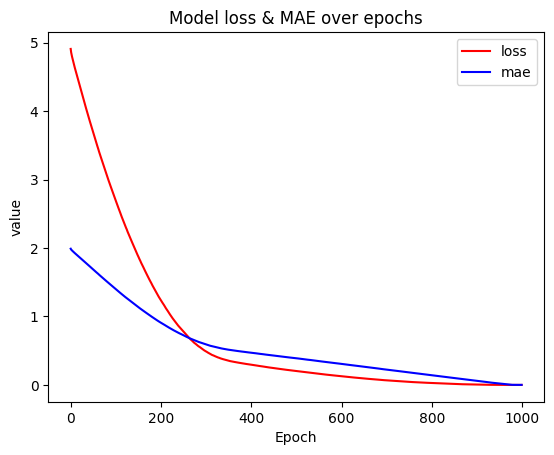

In [17]:
plt.plot(hist.history['loss'], 'r', label = 'loss')
plt.plot(hist.history['mae'], 'b', label = 'mae')
plt.legend()  # 범례 label 추가
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [18]:
# 7. 모델 저장 및 사용
# 학습 후 예측

model.predict(np.array([[0],
                        [0.01]]))  # 섭씨 온도 0, 1 도는 화씨 온도 몇 도?

1/1 [==============================] - 0s 26ms/step


array([[0.31972188],
       [0.33771813]], dtype=float32)

In [19]:
# 학습 후 모델 저장

model.save('model/after_learning.h5')

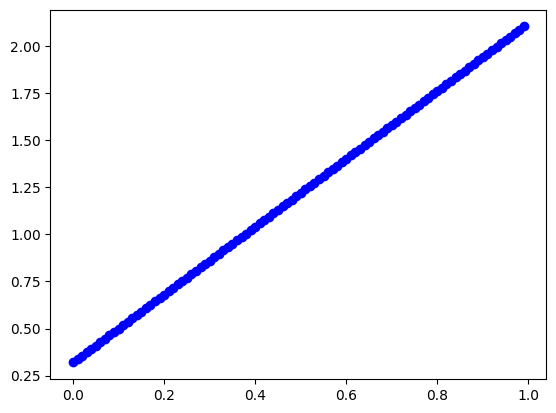

In [20]:
# 실제값

plt.scatter(x = scaled_data_C,
            y = scaled_data_F,
            c = 'b')
plt.show()

In [21]:
# 예측값

y_hat = model.predict([scaled_data_C])
for h, y in zip(y_hat, scaled_data_F) :
    print('예측값 : {}, 실제값 : {}, 오차 : {}'.format(h,
                                               y,
                                               h[0] - y))

4/4 [==============================] - 0s 1ms/step
예측값 : [0.31972188], 실제값 : 0.32, 오차 : -0.00027812242507935236
예측값 : [0.33771813], 실제값 : 0.33799999999999997, 오차 : -0.0002818708419799476
예측값 : [0.35571438], 실제값 : 0.35600000000000004, 오차 : -0.00028561925888065387
예측값 : [0.37371063], 실제값 : 0.374, 오차 : -0.0002893676757812491
예측값 : [0.39170688], 실제값 : 0.392, 오차 : -0.00029311609268189986
예측값 : [0.40970314], 실제값 : 0.41, 오차 : -0.0002968645095824951
예측값 : [0.4276994], 실제값 : 0.428, 오차 : -0.00030061292648314586
예측값 : [0.44569564], 실제값 : 0.446, 오차 : -0.0003043613433837966
예측값 : [0.4636919], 실제값 : 0.46399999999999997, 오차 : -0.00030810976028439185
예측값 : [0.48168814], 실제값 : 0.48200000000000004, 오차 : -0.0003118581771850981
예측값 : [0.4996844], 실제값 : 0.5, 오차 : -0.00031560659408569336
예측값 : [0.51768064], 실제값 : 0.518, 오차 : -0.0003193550109863441
예측값 : [0.5356769], 실제값 : 0.536, 오차 : -0.00032310342788699487
예측값 : [0.55367315], 실제값 : 0.554, 오차 : -0.0003268518447876456
예측값 : [0.57166934], 실제값 : 0.572000000000

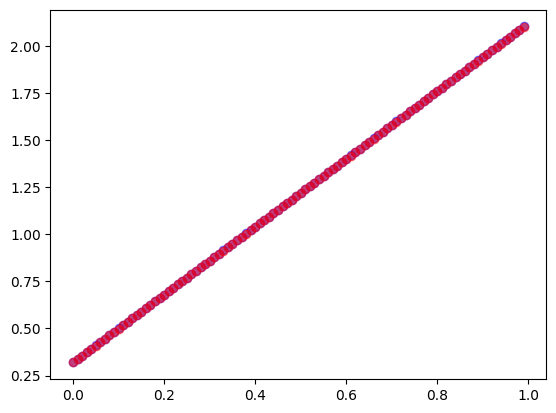

In [22]:
plt.scatter(x = scaled_data_C, y = scaled_data_F, c = 'b', alpha = 0.5)  # 투명한 점그래프
plt.scatter(x = scaled_data_C, y = y_hat, c = 'r', alpha = 0.5)

## 2.2 노이즈가 있는 데이터로 실습

In [23]:
np.random.seed(7)
noise = np.random.normal(0, scale = 0.1, size = 100)  # 평균 : 0, 표준편차 : 0.1, 데이터 갯수 : 100
noised_scaled_data_F = scaled_data_F + noise

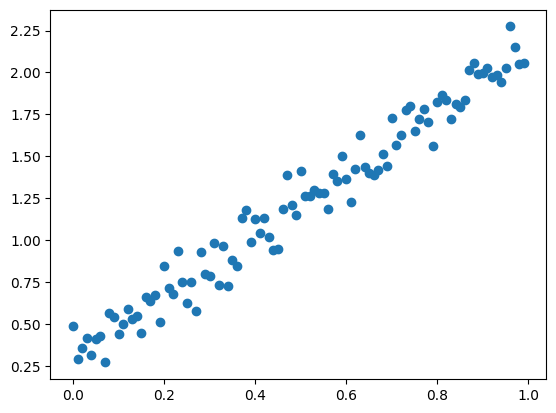

In [24]:
plt.scatter(x = scaled_data_C, y = noised_scaled_data_F)
plt.show()

In [25]:
# 3. 모델 구성

model2 = Sequential()
model2.add(Dense(1, input_shape = (1, )))

# 4. 학습과정 설정

model2.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 5. 모델 학습

hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs = 1000, verbose = 1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4122 - mae: 0.6079
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3983 - mae: 0.5970
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3884 - mae: 0.5892
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3793 - mae: 0.5818
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3708 - mae: 0.5748
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3631 - mae: 0.5685
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3564 - mae: 0.5629
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3494 - mae: 0.5569
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3421 - mae: 0.5508
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3349 - mae: 0.5445
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - lo

4/4 [==============================] - 0s 2ms/step - loss: 0.0111 - mae: 0.0829
Epoch 175/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0828
Epoch 176/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0826
Epoch 177/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0110 - mae: 0.0826
Epoch 178/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0826
Epoch 179/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0109 - mae: 0.0824
Epoch 180/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0826
Epoch 181/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0824
Epoch 182/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0823
Epoch 183/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0820
Epoch 184/1000
4/4 [==============================] - 0s 3ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 347/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0806
Epoch 348/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 350/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 351/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 353/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 354/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 355/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 356/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0806
Epoch 519/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 520/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 521/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 522/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 523/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 524/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 525/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 526/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 527/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 528/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 692/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 693/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 694/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 695/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0809
Epoch 696/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 697/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 698/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0809
Epoch 699/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 863/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 866/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0804
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 868/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 869/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0806
Epoch 870/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 871/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 872/1000
4/4 [==============================] - 0s 2ms/step

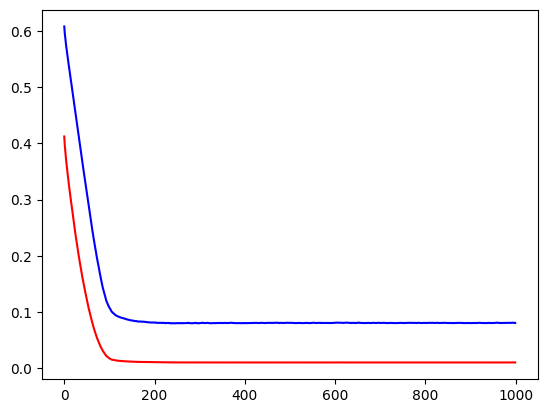

In [27]:
# 6. 학습된 모델 과정 살펴보기

plt.plot(hist2.history['loss'], c = 'r')
plt.plot(hist2.history['mae'], c = 'b')

In [28]:
model.save('model/noise_after_learning.h5')

In [29]:
# 예측값

y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [30]:
for h, y in zip(y_hat, noised_scaled_data_F):
    print("실제값 : {}, 예측값 : {}, 오차 : {}".format(y,
                                                    h,
                                                    h[0] - y))

실제값 : 0.48905257038003563, 예측값 : [0.30663237], 오차 : -0.18242020062333703
실제값 : 0.2914062629459167, 예측값 : [0.32497063], 오차 : 0.03356436984560246
실제값 : 0.3592820163678585, 예측값 : [0.3433089], 오차 : -0.01597312054151878
실제값 : 0.4147516282996508, 예측값 : [0.3616472], 오차 : -0.05310443963616812
실제값 : 0.31310769713742614, 예측값 : [0.37998545], 오차 : 0.06687775456087708
실제값 : 0.4102065572905948, 예측값 : [0.3983237], 오차 : -0.011882842557471018
실제값 : 0.42791096141420687, 예측값 : [0.41666198], 오차 : -0.011248983646262534
실제값 : 0.2705275693654579, 예측값 : [0.43500024], 오차 : 0.16447267143730698
실제값 : 0.5657658005663493, 예측값 : [0.4533385], 오차 : -0.11242729672876384
실제값 : 0.542049851591955, 예측값 : [0.47167677], 오차 : -0.07037308471954895
실제값 : 0.43745710260332404, 예측값 : [0.49001503], 오차 : 0.05255792730390252
실제값 : 0.5008451738804279, 예측값 : [0.5083533], 오차 : 0.0075081190616191895
실제값 : 0.5865299374196752, 예측값 : [0.52669156], 오차 : -0.05983838144280751
실제값 : 0.5278643584808353, 예측값 : [0.5450299], 오차 : 0.017165520135497

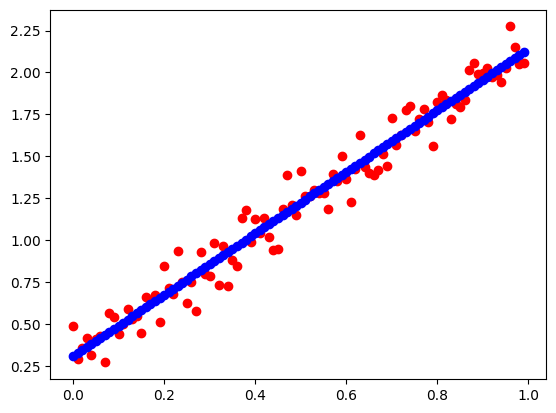

In [31]:
plt.scatter(x = scaled_data_C, y = noised_scaled_data_F, c = 'r')
plt.scatter(x = scaled_data_C, y = y_hat, c = 'b')